In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from tqdm import tqdm
import pandas as pd
from IPython.display import display
import sympy
from scipy.signal import find_peaks

Señal 1  EEG en reposo: [179. 169. 220. ... 231. 251. 266.]
Señal 2  Parpadeo : [392. 377. 377. ... 911. 905. 885.]
Señal 3 ejercicio mental : [301. 295. 295. ... 423. 433. 463.]


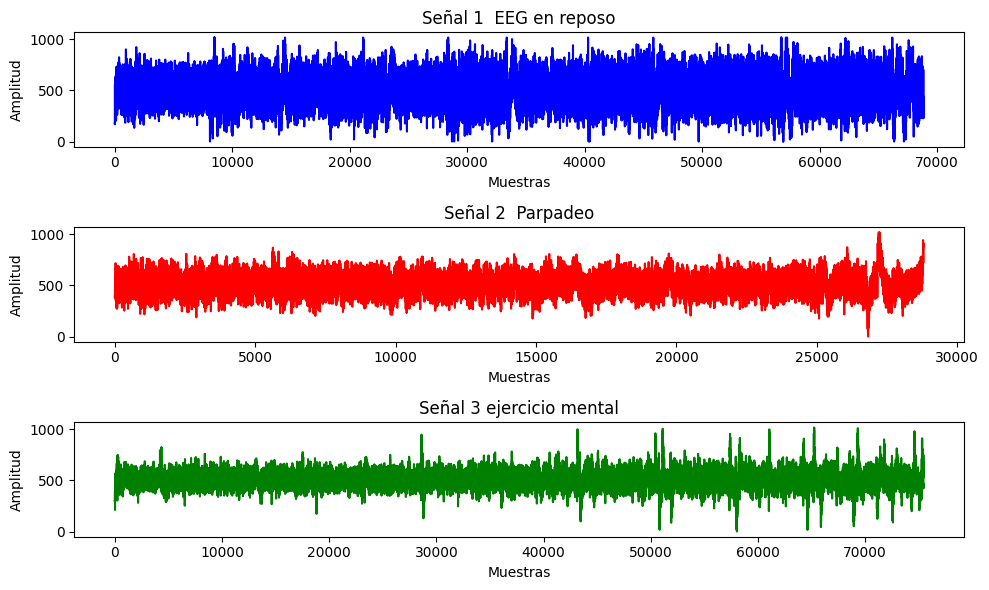

In [7]:
#Lectura de documento txt con tabulación (/t) como delimitador
array2= np.genfromtxt('/content/drive/MyDrive/Colab Notebooks/EEG30sreposo.txt')
array1=np.genfromtxt('/content/drive/MyDrive/Colab Notebooks/EEGparpadeo.txt')
array3=np.genfromtxt('/content/drive/MyDrive/Colab Notebooks/ejercicio2.txt')

array1 = array1[:,8]
print("Señal 1  EEG en reposo:",array1)
array2 = array2[:,8]
print("Señal 2  Ojos cerrados - Ojos abiertos :",array2)
array3= array3[:,8]
print("Señal 3 ejercicio mental :",array3)


plt.figure(figsize=(10, 6))

# Gráfico de la señal 1
plt.subplot(311)
plt.plot(array1, color='blue')
plt.title('Señal 1  EEG en reposo')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

# Gráfico de la señal 2
plt.subplot(312)
plt.plot(array2, color='red')
plt.title('Señal 2  Ojos cerrados - Ojos abiertos')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

# Gráfico de la señal 3
plt.subplot(313)
plt.plot(array3, color='green')
plt.title('Señal 3 ejercicio mental')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

# Ajustar el diseño y mostrar la gráfica
plt.tight_layout()
plt.show()

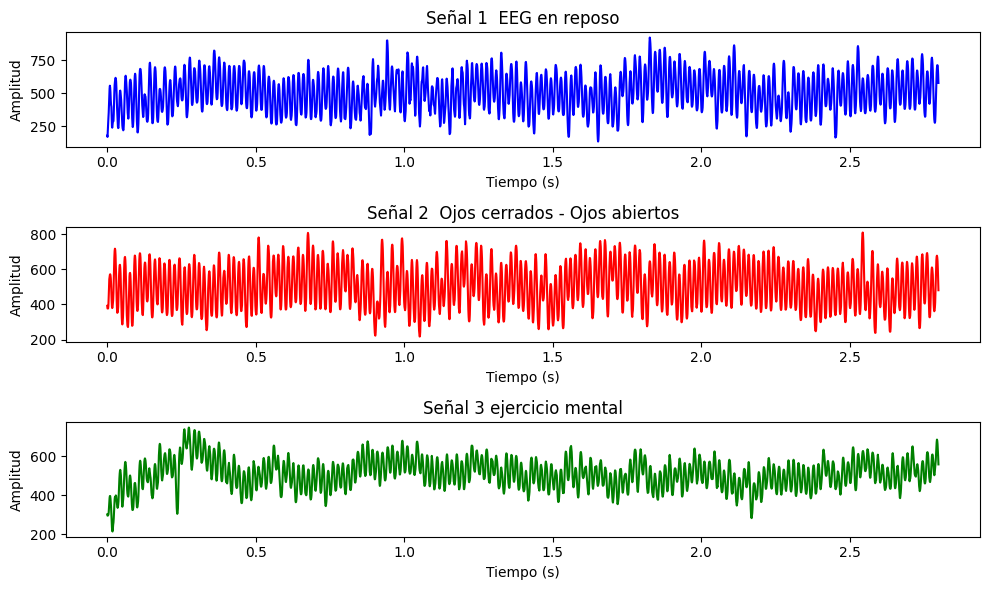

In [8]:
Fs=1000; #Frecuencia de muestreo
T1=1/Fs
array1=array1[0:2800]
array2=array2[0:2800]
array3=array3[0:2800]
#Los elementos ahora son los mismos para todas las señales
M = len(array1)
n = np.arange(0,M)

t = n/Fs
# Crear figuras y subgráficos
plt.figure(figsize=(10, 6))

# Gráfico de la señal 1
plt.subplot(311)
plt.plot(t, array1, color='blue')
plt.title('Señal 1  EEG en reposo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

# Gráfico de la señal 2
plt.subplot(312)
plt.plot(t, array2, color='red')
plt.title('Señal 2  Ojos cerrados - Ojos abiertos')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

# Gráfico de la señal 3
plt.subplot(313)
plt.plot(t, array3, color='green')
plt.title('Señal 3 ejercicio mental')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

# Ajustar el diseño y mostrar la gráfica
plt.tight_layout()
plt.show()

# DFT - Señales originales

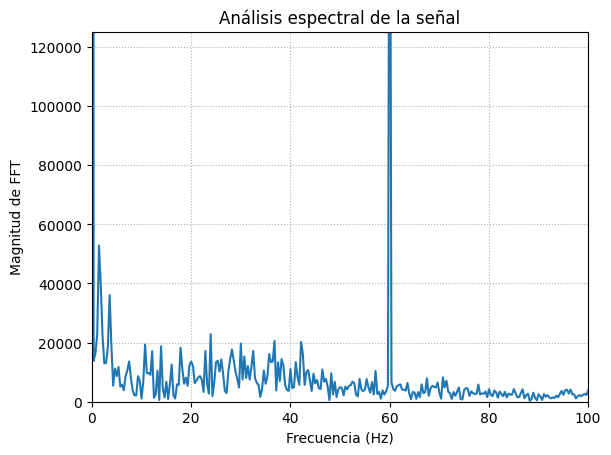

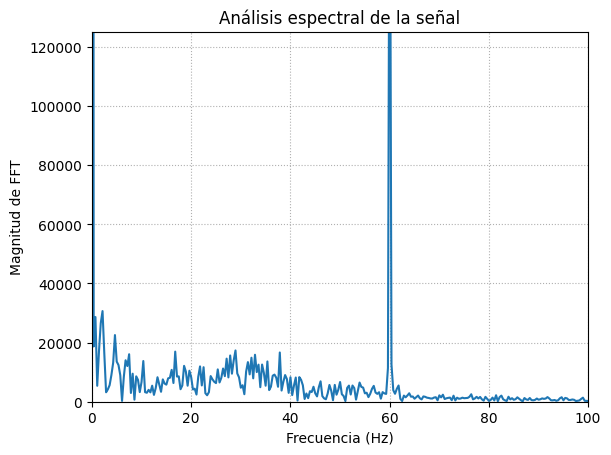

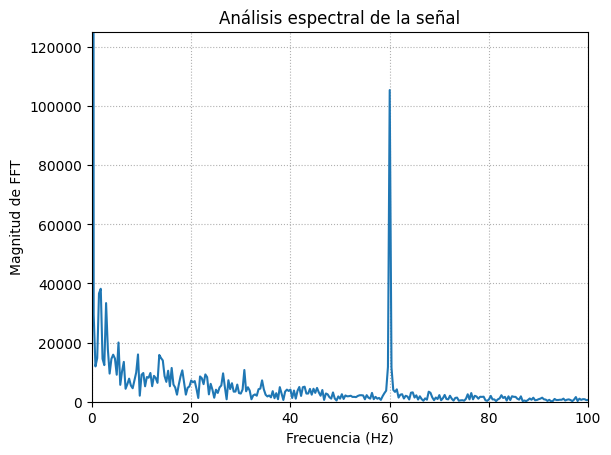

In [9]:
def analisis_espectral(signal, Fs):
    N = len(signal)
    X = np.fft.fft(signal, N)
    X = X[0:N//2]
    Xm = np.abs(X)
    F = np.linspace(0, Fs/2, N//2)

    plt.plot(F, Xm)
    plt.grid(linestyle=":")
    plt.title("Análisis espectral de la señal")
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("Magnitud de FFT")
    plt.xlim([0, 100])  # Limitando el rango de frecuencia para la visualización
    plt.ylim([0, 0.125*1e6])  # Limitando el rango del espectro para la visualización

    plt.show()

# Usando la función para las señales
analisis_espectral(array1, Fs)
analisis_espectral(array2, Fs)
analisis_espectral(array3, Fs)

# DFT - Señal filtrada con Notch


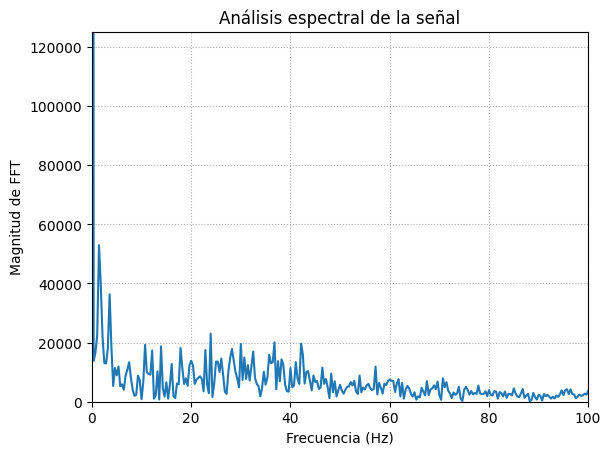

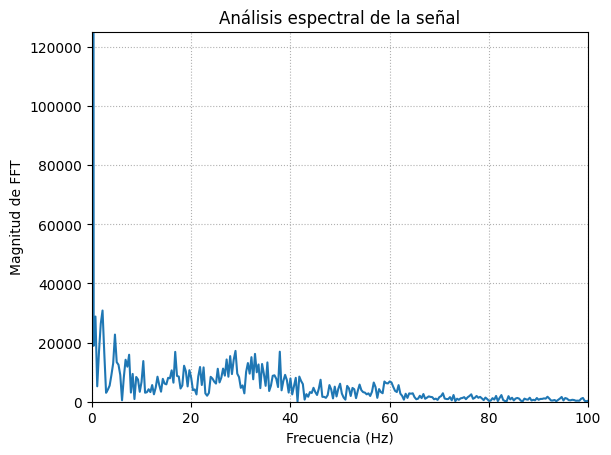

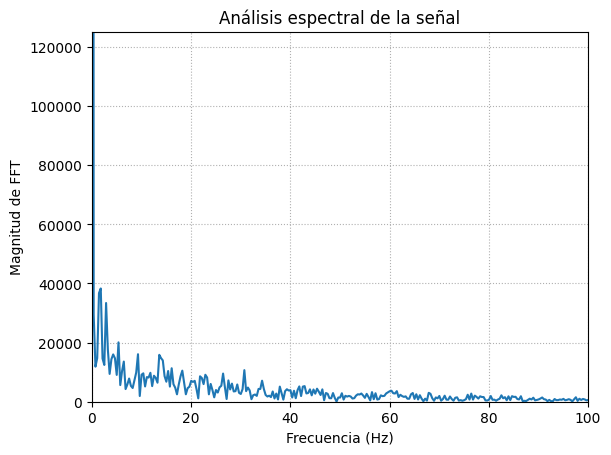

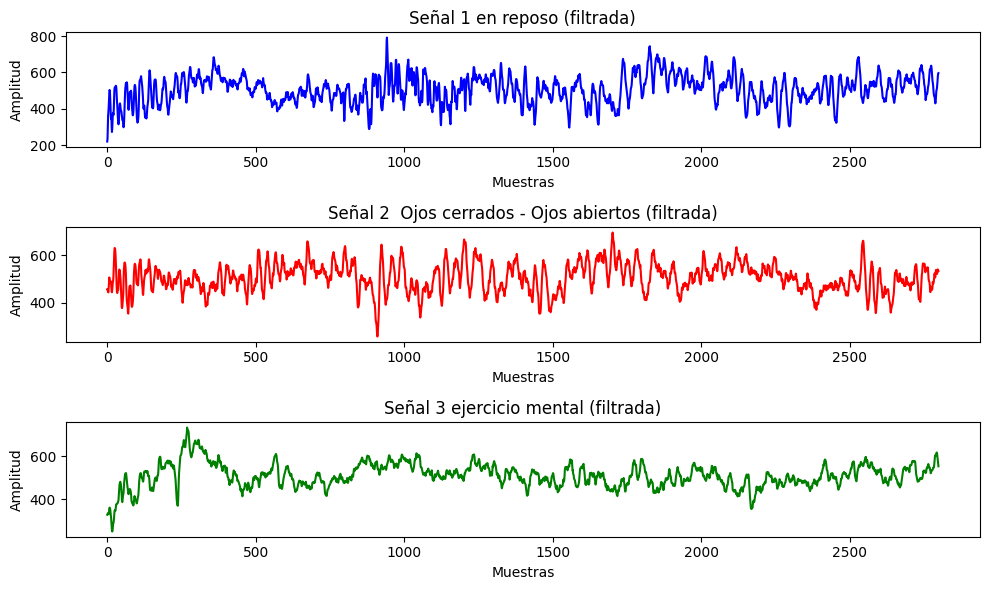

In [10]:
fs = 1000  # Esto es un ejemplo, deberías usar la frecuencia de muestreo correcta de tus datos

# Diseñar el filtro notch para eliminar la frecuencia de línea de energía (en Hz)
f0 = 60.0  # Frecuencia de línea de energía en Hz
Q = 30.0  # Factor de calidad del filtro notch

# Calcular la frecuencia normalizada
w0 = f0 / (fs / 2)

# Diseñar el filtro notch
b, a = signal.iirnotch(w0, Q)

# Aplicar el filtro notch a cada señal
filtered_array1 = signal.filtfilt(b, a, array1)
filtered_array2 = signal.filtfilt(b, a, array2)
filtered_array3 = signal.filtfilt(b, a, array3)

# Mostrar el análisis espectral de las señales filtradas
analisis_espectral(filtered_array1, fs)
analisis_espectral(filtered_array2, fs)
analisis_espectral(filtered_array3, fs)

# Plotear las señales filtradas
plt.figure(figsize=(10, 6))

# Gráfico de la señal 1
plt.subplot(311)
plt.plot(filtered_array1, color='blue')
plt.title('Señal 1 en reposo (filtrada)')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

# Gráfico de la señal 2
plt.subplot(312)
plt.plot(filtered_array2, color='red')
plt.title('Señal 2  Ojos cerrados - Ojos abiertos (filtrada)')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

# Gráfico de la señal 3
plt.subplot(313)
plt.plot(filtered_array3, color='green')
plt.title('Señal 3 ejercicio mental (filtrada)')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

# Ajustar el diseño y mostrar la gráfica
plt.tight_layout()
plt.show()

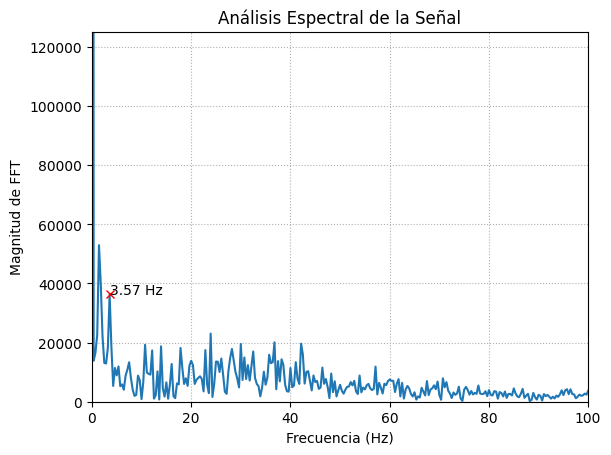

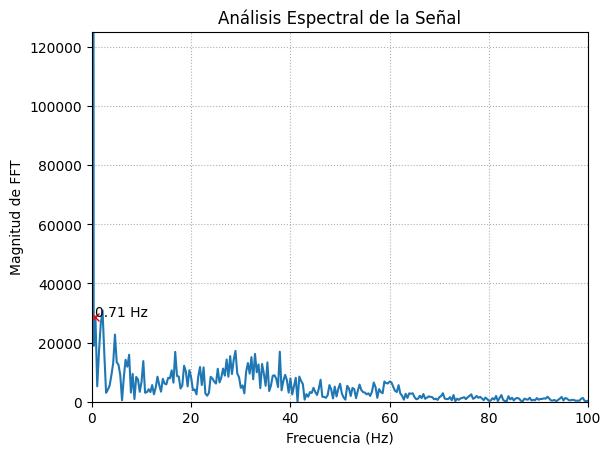

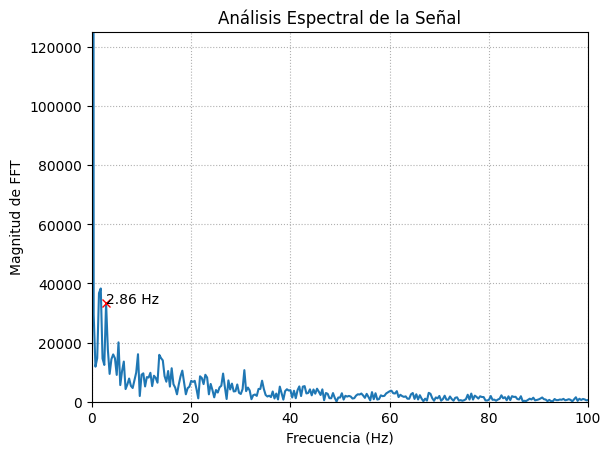

In [12]:
def analisis_espectral_peak(signal, Fs, N):
    X = np.fft.fft(signal, N)
    X = X[0:N//2]
    Xm = np.abs(X)
    F = np.linspace(0, Fs/2, N//2)

    plt.plot(F, Xm)
    plt.grid(linestyle=":")
    plt.title("Análisis Espectral de la Señal")
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("Magnitud de FFT")
    plt.xlim([0, 100])  # Limitando el rango de frecuencia para la visualización
    plt.ylim([0, 0.125*1e6])  # Limitando el rango del espectro para la visualización

    # Encontrar los dos picos más altos en el espectro
    peaks, _ = find_peaks(Xm, height=100)
    sorted_peaks = sorted(peaks, key=lambda x: Xm[x], reverse=True)
    second_peak_index = sorted_peaks[1]
    second_peak_frequency = F[second_peak_index]
    second_peak_magnitude = Xm[second_peak_index]

    # Marcar el segundo pico más alto en el gráfico
    plt.plot(F[second_peak_index], Xm[second_peak_index], "rx")
    plt.text(F[second_peak_index], Xm[second_peak_index], f"{np.round(second_peak_frequency, 2)} Hz")

    plt.show()

# Aquí irían las definiciones de filtered_array1, filtered_array2 y filtered_array3
N_1 = len(filtered_array1)
N_2 = len(filtered_array2)
N_3 = len(filtered_array3)
analisis_espectral_peak(filtered_array1, Fs, N_1)
analisis_espectral_peak(filtered_array2, Fs, N_2)
analisis_espectral_peak(filtered_array3, Fs, N_3)

# Diseño de filtro

In [79]:
# Diseño del filtro Butterworth de paso de banda
wp = 2*np.pi*35  # Frecuencia de paso en radianes/segundo
ws = 2*np.pi*157  # Frecuencia de stop en radianes/segundo
N_ord, Wc = signal.buttord(wp, ws, gpass=3, gstop=40, analog=True)  # Cálculo del orden y frecuencia de corte
fc = np.round(Wc/(2*np.pi), 2)  # Frecuencia de corte calculada en Hz
print(f"Orden del filtro: {N_ord}")
print(f"Frecuencia de corte calculada: {fc} Hz")

Orden del filtro: 4
Frecuencia de corte calculada: 35.02 Hz


In [80]:
# Funcion de transferencia del filtro pasa bajo analogico
b_butter,a_butter = signal.butter(N_ord, Wc, 'lowpass', True, 'ba')

#np.set_printoptions(precision=3)
b_butter,a_butter

(array([2.34435227e+09]),
 array([1.00000000e+00, 5.74997633e+02, 1.65311139e+05, 2.78405296e+07,
        2.34435227e+09]))

# Respuesta en frecuencia del filtro analógico

Text(0.5, 1.0, 'Filtro Butteworth - Corte en frecuencias altas')

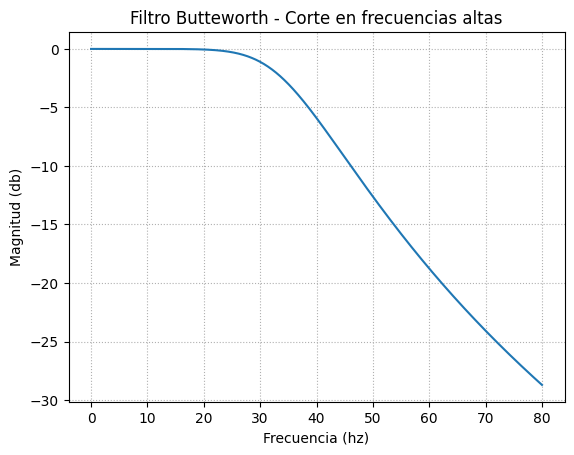

In [92]:
Fmax=80
F_freqs = np.linspace(0,Fmax,1000)
W_freqs = 2*np.pi*F_freqs  #Angular frecuences

W_freqs, H = signal.freqs(b_butter,a_butter,W_freqs)
Hm=np.abs(H)
plt.plot(F_freqs, 20 * np.log10(Hm))
plt.grid(linestyle=":")
plt.xlabel("Frecuencia (hz)")
plt.ylabel("Magnitud (db)")
plt.title("Filtro Butteworth - Corte en frecuencias altas")

# Transformada bilineal de H(s) a H(z)

Text(0, 0.5, 'Magnitud (db)')

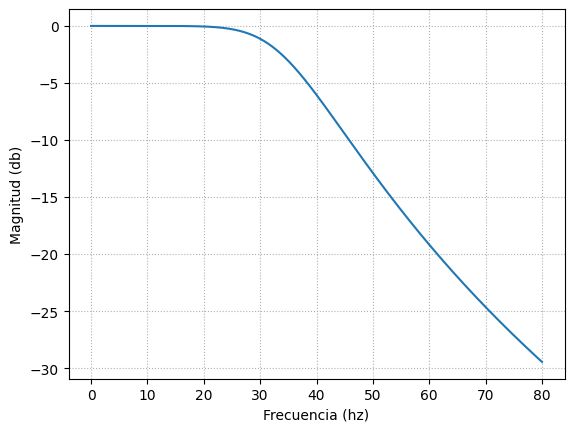

In [93]:
bd, ad = signal.bilinear(b_butter,a_butter,Fs)

Wz, Hd = signal.freqz(bd, ad, W_freqs/Fs)

Hdm = np.abs(Hd)
plt.plot(F_freqs, 20 * np.log10(Hdm))
plt.grid(linestyle=":")
plt.xlabel("Frecuencia (hz)")
plt.ylabel("Magnitud (db)")

# Filtrado

# Reposo

Text(0.5, 0, 'tiempo (s)')

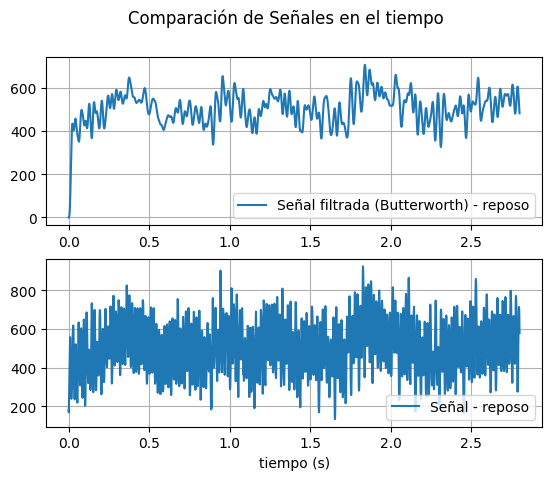

In [94]:
y1 = signal.lfilter(bd,ad,filtered_array1)

fig, ax = plt.subplots(2,1)
fig.suptitle('Comparación de Señales en el tiempo', fontsize=12)
ax[0].plot(t,y1, label="Señal filtrada (Butterworth) - reposo")
ax[0].legend(loc="lower right")
ax[0].grid()
ax[1].plot(t,array1, label="Señal - reposo")
ax[1].legend(loc="lower right")
ax[1].grid()
ax[1].set_xlabel("tiempo (s)")

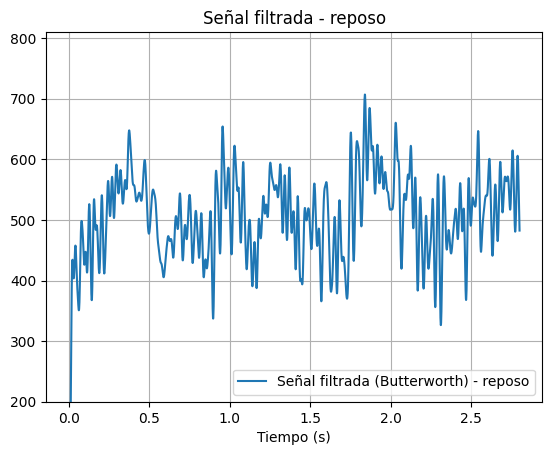

In [102]:
plt.plot(t, y1, label="Señal filtrada (Butterworth) - reposo")
plt.legend(loc="lower right")
plt.grid()
plt.xlabel("Tiempo (s)")
plt.title("Señal filtrada - reposo")
plt.ylim([200,810])
plt.show()

(0.0, 125000.0)

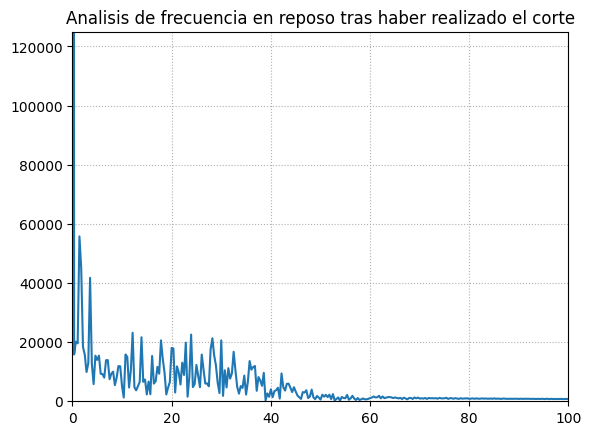

In [95]:
N1=len(filtered_array1)
Yf1 = np.fft.fft(y1,N1)
Yf1 = Yf1[:N1//2]
Ym1 = np.abs(Yf1)

Fd1 = np.linspace(0, Fs//2, N1//2)
plt.plot(Fd1, Ym1)
plt.grid(linestyle=":")
plt.title("Analisis de frecuencia en reposo tras haber realizado el corte")
plt.xlim([0,100])
plt.ylim([0,0.125*1e6])

# Ojos cerrados - ojos abiertos

Text(0.5, 0, 'tiempo (s)')

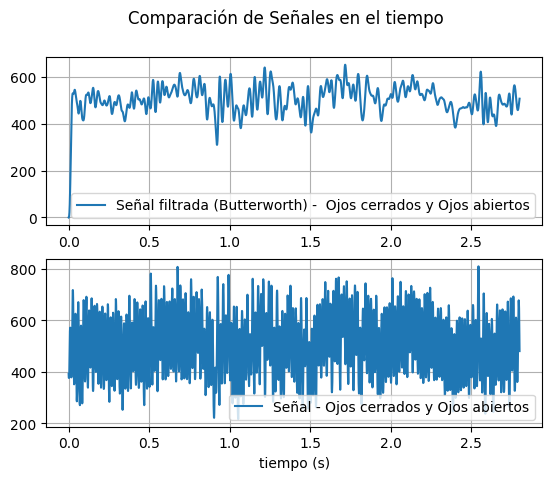

In [96]:
y2 = signal.lfilter(bd,ad,filtered_array2)

fig, ax = plt.subplots(2,1)
fig.suptitle('Comparación de Señales en el tiempo', fontsize=12)
ax[0].plot(t,y2, label="Señal filtrada (Butterworth) -  Ojos cerrados y Ojos abiertos")
ax[0].legend(loc="lower right")
ax[0].grid()
ax[1].plot(t,array2, label="Señal - Ojos cerrados y Ojos abiertos")
ax[1].legend(loc="lower right")
ax[1].grid()
ax[1].set_xlabel("tiempo (s)")

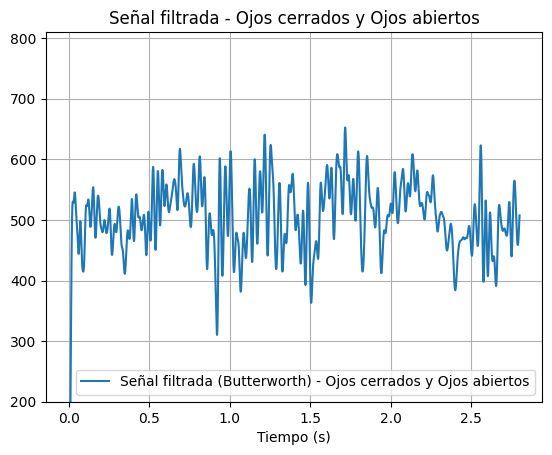

In [103]:
plt.plot(t, y2, label="Señal filtrada (Butterworth) - Ojos cerrados y Ojos abiertos")
plt.legend(loc="lower right")
plt.grid()
plt.xlabel("Tiempo (s)")
plt.title("Señal filtrada - Ojos cerrados y Ojos abiertos")
plt.ylim([200,810])
plt.show()

(0.0, 125000.0)

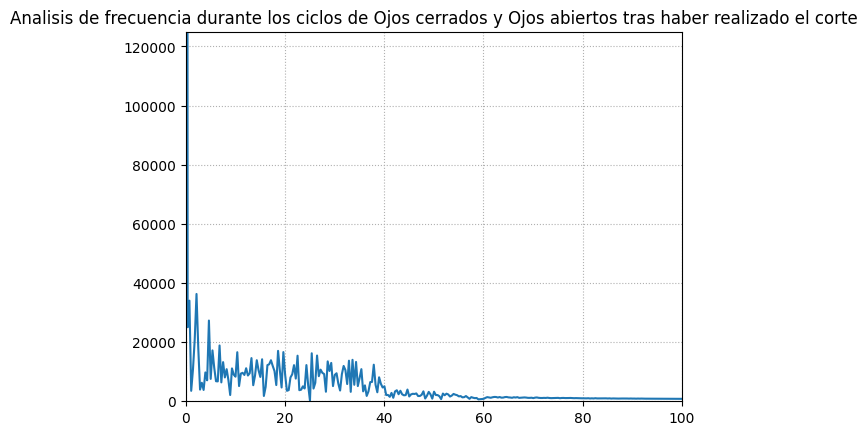

In [97]:
N2=len(filtered_array2)
Yf2 = np.fft.fft(y2,N2)
Yf2 = Yf2[:N2//2]
Ym2 = np.abs(Yf2)

Fd2 = np.linspace(0, Fs//2, N2//2)
plt.plot(Fd2, Ym2)
plt.grid(linestyle=":")
plt.title("Analisis de frecuencia durante los ciclos de Ojos cerrados y Ojos abiertos tras haber realizado el corte")
plt.xlim([0,100])
plt.ylim([0,0.125*1e6])

# Ejercicio mental

Text(0.5, 0, 'tiempo (s)')

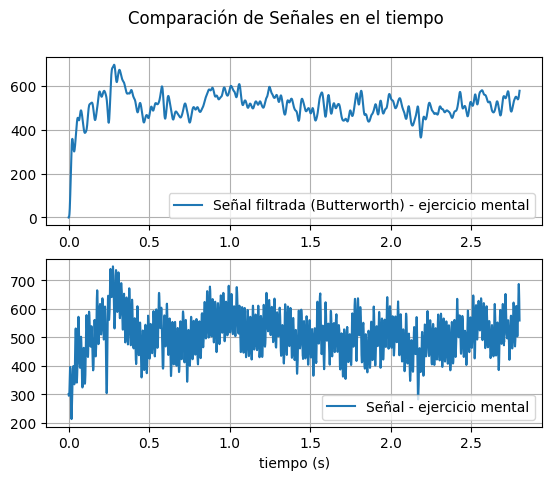

In [98]:
y3 = signal.lfilter(bd,ad,filtered_array3)

fig, ax = plt.subplots(2,1)
fig.suptitle('Comparación de Señales en el tiempo', fontsize=12)
ax[0].plot(t,y3, label="Señal filtrada (Butterworth) - ejercicio mental")
ax[0].legend(loc="lower right")
ax[0].grid()
ax[1].plot(t,array3, label="Señal - ejercicio mental")
ax[1].legend(loc="lower right")
ax[1].grid()
ax[1].set_xlabel("tiempo (s)")

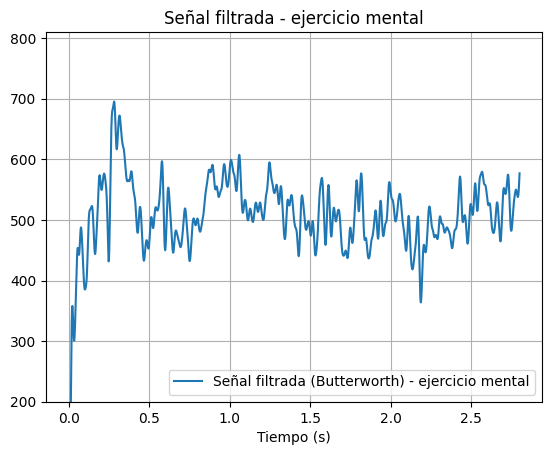

In [104]:
plt.plot(t, y3, label="Señal filtrada (Butterworth) - ejercicio mental")
plt.legend(loc="lower right")
plt.grid()
plt.xlabel("Tiempo (s)")
plt.title("Señal filtrada - ejercicio mental")
plt.ylim([200,810])
plt.show()

(0.0, 125000.0)

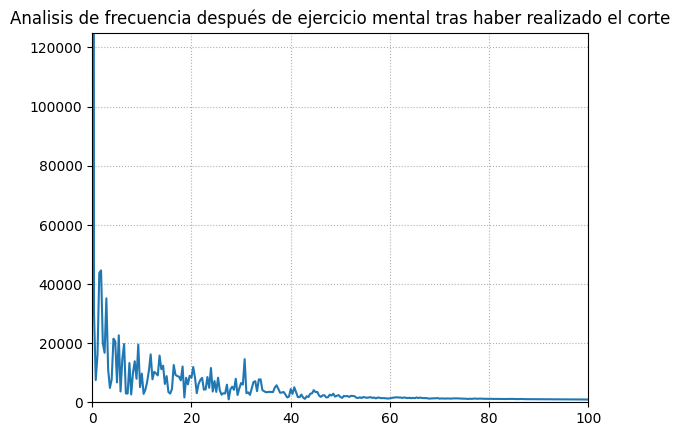

In [99]:
N3=len(filtered_array3)
Yf3 = np.fft.fft(y3,N3)
Yf3 = Yf3[:N3//2]
Ym3 = np.abs(Yf3)

Fd3 = np.linspace(0, Fs//2, N3//2)
plt.plot(Fd3, Ym3)
plt.grid(linestyle=":")
plt.title("Analisis de frecuencia después de ejercicio mental tras haber realizado el corte")
plt.xlim([0,100])
plt.ylim([0,0.125*1e6])